# Analyzing Amazon Sales data

Sample Data Set containing Amazon Food category and showing types of food items purchased by respective customer

# In Data Analysis What All Things We Do

* Missing Values
* Explore About the Numerical Variables
* Explore About categorical Variables
* Finding Relationship between features

In [1]:
!pip install abc-analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from abc_analysis import abc_analysis
import matplotlib.ticker as mtick

In [3]:
data = pd.read_excel('SALESDATA.xls')

In [4]:
data.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [5]:
data.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Unnamed: 20
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000,0.0
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398,NaN
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936,NaN
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000,NaN
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000,NaN
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000,NaN
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000,NaN
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [7]:
data.shape

(65282, 22)

In [8]:
data.duplicated().sum()

0

In [9]:
data['Item'].value_counts()

Better Fancy Canned Sardines    1648
Ebony Prepared Salad            1471
Moms Sliced Turkey              1192
Imagine Popsicles               1191
Discover Manicotti              1126
                                ... 
Fast Salted Pretzels               1
Great Bagels                       1
Imagine Frozen Cauliflower         1
Jeffers Corn Puffs                 1
Bravo Fancy Canned Sardines        1
Name: Item, Length: 657, dtype: int64

In [10]:
data['CustKey'].value_counts()

10025919    2760
10019194    2752
10012715    1431
10012226    1389
10025025    1143
            ... 
10019469       1
10009660       1
10002140       1
10020227       1
10014059       1
Name: CustKey, Length: 615, dtype: int64

Total number of customers are 615

In [11]:
data1=data.copy()

In [12]:
data1.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [13]:
a=data1['Sales Price'].value_counts()

In [14]:
data1.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
Unnamed: 20                         65282
Unnamed: 21                         65278
dtype: int64

In [15]:
features =[]
for i in data1.columns:
    if data1[i].isnull().sum()>0:
        features.append(i)

In [16]:
features

['Discount Amount',
 'Item Class',
 'Item Number',
 'Sales Price',
 'Unnamed: 20',
 'Unnamed: 21']

In [17]:
data1.drop(['Unnamed: 20','Unnamed: 21'], axis =1, inplace=True)

In [18]:
r = data1['CustKey'].value_counts()

In [19]:
l=[]
for i in data1['Item'].unique():
    List = i.split(',')
    for i in List:
        l.append(i)

In [20]:
l

['Urban Large Eggs',
 'Moms Sliced Turkey',
 'Cutting Edge Foot-Long Hot Dogs',
 'Kiwi Lox',
 'High Top Sweet Onion',
 'Best Choice Fudge Brownies',
 'Tell Tale Garlic',
 'High Top Walnuts',
 'Big Time Frozen Cheese Pizza',
 'Super Creamy Peanut Butter',
 'Better Fancy Canned Sardines',
 'Red Spade Low Fat Cole Slaw',
 'Jumbo Large Eggs',
 'High Top Corn on the Cob',
 'Moms Low Fat Bologna',
 'Landslide Columbian Coffee',
 'High Top Dried Mushrooms',
 'Gorilla Chocolate Milk',
 'Gorilla Jack Cheese',
 'Ebony Prepared Salad',
 'Bravo Canned Yams',
 'Red Spade Low Fat Bologna',
 'Pearl Chardonnay',
 'Fast Dried Apples',
 'Bravo Large Canned Shrimp',
 'Cutting Edge Turkey Hot Dogs',
 'Red Spade Foot-Long Hot Dogs',
 'Cutting Edge Sliced Ham',
 'Fast Low Fat BBQ Chips',
 'Golden Frozen Chicken Thighs',
 'Imagine Popsicles',
 'Red Spade Turkey Hot Dogs',
 'Fast Low Fat Cookies',
 'American Roasted Chicken',
 'Tell Tale Canned Peanuts',
 'Golden Waffles',
 'BBB Best Strawberry Jelly',
 'Thre

In [21]:
items_count= pd.Series(l).value_counts().sort_index().reset_index().reset_index(drop= True)
items_count.columns = ['Item','Count']
items_count

,Item,Count
0,American Beef Bologna,1
1,American Chicken Hot Dogs,1
2,American Cole Slaw,1
3,American Corned Beef,1
4,American Pimento Loaf,1
...,...,...
652,Washington Diet Cola,1
653,Washington Diet Soda,1
654,Washington Mango Drink,1
655,Washington Orange Juice,1


In [22]:
data1.groupby('Item').sum()['Sales Quantity']

Item
American Beef Bologna           230
American Chicken Hot Dogs       135
American Cole Slaw                2
American Corned Beef           2722
American Pimento Loaf           216
                               ... 
Washington Diet Cola            826
Washington Diet Soda           1423
Washington Mango Drink          478
Washington Orange Juice        2104
Washington Strawberry Drink     134
Name: Sales Quantity, Length: 657, dtype: int64

In [23]:
data1['DateKey'].min()

Timestamp('2017-01-01 00:00:00')

In [24]:
data1['DateKey'].max()

Timestamp('2019-12-31 00:00:00')

In [25]:
data1['month_year']=data1['DateKey'].apply(lambda x : x.strftime('%y-%m'))

In [26]:
data1_trend= data1.groupby('month_year').sum()['Sales Amount'].reset_index()

In [27]:
data1_trend

,month_year,Sales Amount
0,17-01,8650450.48
1,17-02,7216327.65
2,17-03,7567525.47
3,17-04,5650871.78
4,17-05,5988694.88
5,17-06,8674182.00
6,17-07,6391727.78
7,17-08,7749377.54
8,17-09,8786342.38
9,17-10,6368884.91


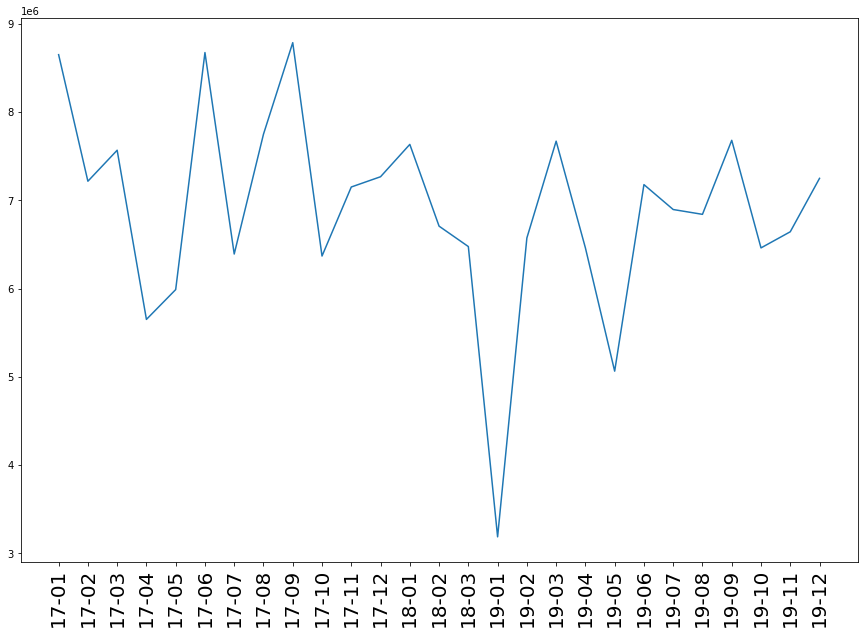

In [28]:
plt.figure(figsize=(15,10))
plt.plot(data1_trend['month_year'],data1_trend['Sales Amount'])
plt.xticks(rotation = 'vertical',size=20)
plt.show()

# So Sale Amount was
* Highest in september 2017
* Lowest in january 2019

In [29]:
proud_sales=pd.DataFrame(data1.groupby('Item').sum()['Sales Amount'])

In [30]:
proud_sales=proud_sales.sort_values('Sales Amount', ascending=False)

# Top 10 items based on sales amount

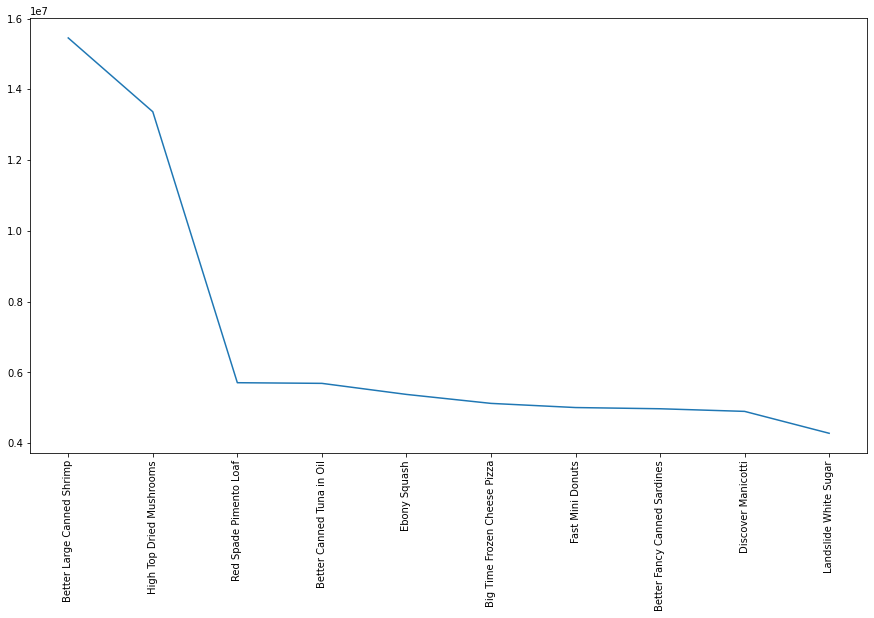

In [31]:
plt.figure(figsize=(15,8))
plt.plot(proud_sales.head(10))
plt.xticks(rotation='vertical',size =10)
plt.show()

In [32]:
proud_sales.tail(10)

,Sales Amount
Item,
Great Bagels,356.10
BBB Best Corn Oil,327.06
Fantastic Blueberry Muffins,284.52
High Top Green Pepper,254.30
Jeffers Corn Puffs,248.85
Choice Bubble Gum,226.73
Tell Tale Potatos,222.00
Best Choice Sesame Crackers,206.98
High Top Mushrooms,204.00


In [33]:
most_sold_item=pd.DataFrame(data1.groupby('Item').sum()['Sales Quantity'])

In [34]:
c=most_sold_item.sort_values('Sales Quantity',ascending=False)

In [35]:
c.head(10)

,Sales Quantity
Item,
Better Large Canned Shrimp,590343
High Top Dried Mushrooms,377259
Better Canned Tuna in Oil,266996
Walrus Chardonnay,212022
Red Spade Pimento Loaf,163296
Even Better String Cheese,105559
Landslide Hot Chocolate,98465
Golden Frozen Broccoli,48040
Tell Tale Red Delcious Apples,31120


In [36]:
profit_subcat=pd.DataFrame(data1.groupby(['U/M','Item']).sum()['Sales Margin Amount'])

In [37]:
profit_subcat.sort_values(['U/M','Sales Margin Amount'],ascending=False)

Sales Margin Amount
U/M Item                                               
SE  Golden Frozen Corn                        812129.44
    High Top Dried Mushrooms                  771242.55
    Nationeel Salted Pretzels                 761146.08
    Ebony Macintosh Apples                    445150.99
    Golden Frozen Broccoli                    429471.50
...                                                 ...
EA  Landslide Low Fat Apple Butter             -4026.61
    Carlson Blueberry Yogurt                   -4278.90
    Just Right Chicken Soup                   -14365.44
    Best Choice Fondue Mix                    -22426.53
    Fast Lemon Cookies                        -46106.59

[726 rows x 1 columns]

In [38]:
data1.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,month_year
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1,184,EA,17-04
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1,127,EA,17-07
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1,127,EA,17-10
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1,160,EA,17-06
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,17-05


In [39]:
def year (x):
    return x.split('-')[0]

def month (x):
    return x.split('-')[1]

In [40]:
data1['Month']=data1['month_year'].apply(month)

In [41]:
data1['Year']=data1['month_year'].apply(year)

In [42]:
data1.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,month_year,Month,Year
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,0.00,0.0,237.91,237.910000,1,184,EA,17-04,04,17
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,824.96,0.0,456.17,456.170000,1,127,EA,17-07,07,17
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,548.66,0.0,438.93,438.930000,1,127,EA,17-10,10,17
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,0.00,0.0,211.75,211.750000,1,160,EA,17-06,06,17
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,185876.60,0.0,89248.66,196.150901,455,124,SE,17-05,05,17


In [44]:
data1['Month'].unique()

array(['04', '07', '10', '06', '05', '09', '08', '11', '01', '02', '03',
       '12'], dtype=object)

In [45]:
data1['Month'].value_counts()

03    7308
02    6556
01    6066
12    5645
09    5555
06    5377
10    5250
11    5247
05    5167
08    4738
07    4396
04    3977
Name: Month, dtype: int64

In [46]:
data1.dtypes

CustKey                                      int64
DateKey                             datetime64[ns]
Discount Amount                            float64
Invoice Date                        datetime64[ns]
Invoice Number                               int64
Item Class                                  object
Item Number                                 object
Item                                        object
Line Number                                  int64
List Price                                 float64
Order Number                                 int64
Promised Delivery Date              datetime64[ns]
Sales Amount                               float64
Sales Amount Based on List Price           float64
Sales Cost Amount                          float64
Sales Margin Amount                        float64
Sales Price                                float64
Sales Quantity                               int64
Sales Rep                                    int64
U/M                            

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.5       , -0.47777778, -0.45555556, -0.43333333, -0.41111111,
        -0.38888889, -0.36666667, -0.34444444, -0.32222222, -0.3       ,
        -0.27777778, -0.25555556, -0.23333333, -0.21111111, -0.18888889,
        -0.16666667, -0.14444444, -0.12222222, -0.1       , -0.07777778,
        -0.05555556, -0.03333333, -0.01111111,  0.01111111,  0.03333333,
         0.05555556,  0.07777778,  0.1       ,  0.12222222,  0.14444444,
         0.16666667,  0.18888889,  0.21111111,  0.23333333,  0.25555556,
         0.27777778,  0.3       ,  0.32222222,  0.34444444,  0.36666667,
         0.38888889,  0.41111111,  0.43333333,  0.45555556,  0.47777778,
         0.5       ]),
 <BarContainer object of 45 artists>)

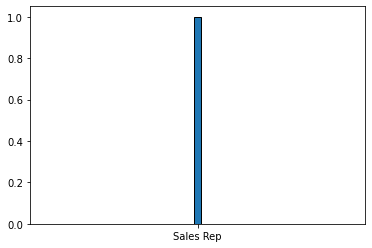

In [47]:
xyz=['Sales Rep']
plt.hist(xyz,bins=45,edgecolor='black')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

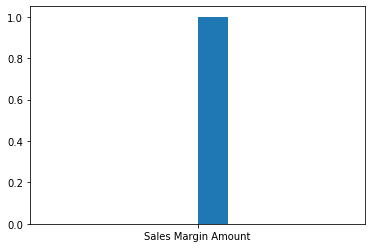

In [61]:
plt.hist('Sales Margin Amount')

In [49]:
data1['Month']=data1['Month'].astype(int)

In [51]:
data1.dtypes

CustKey                                      int64
DateKey                             datetime64[ns]
Discount Amount                            float64
Invoice Date                        datetime64[ns]
Invoice Number                               int64
Item Class                                  object
Item Number                                 object
Item                                        object
Line Number                                  int64
List Price                                 float64
Order Number                                 int64
Promised Delivery Date              datetime64[ns]
Sales Amount                               float64
Sales Amount Based on List Price           float64
Sales Cost Amount                          float64
Sales Margin Amount                        float64
Sales Price                                float64
Sales Quantity                               int64
Sales Rep                                    int64
U/M                            

In [52]:
data1.groupby('Month')['Sales Amount'].sum()

Month
1     19471739.54
2     20497349.91
3     21714172.68
4     12112134.49
5     11053298.15
6     15852396.38
7     13287585.39
8     14590611.40
9     16466268.87
10    12829983.51
11    13794762.06
12    14516466.67
Name: Sales Amount, dtype: float64

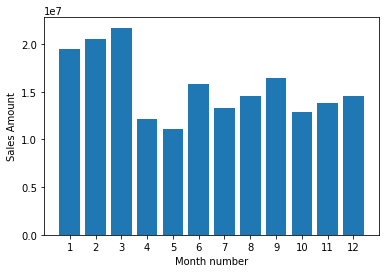

In [53]:
months=range(1,13)
plt.bar(months,data1.groupby('Month')['Sales Amount'].sum())
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales Amount')
plt.show()

In [55]:
data1['year']=data1['DateKey'].apply(lambda x: x.strftime('%y'))

In [56]:
data1.groupby('year')['Sales Amount'].sum()

year
17    87462706.40
18    20817471.00
19    77906591.65
Name: Sales Amount, dtype: float64

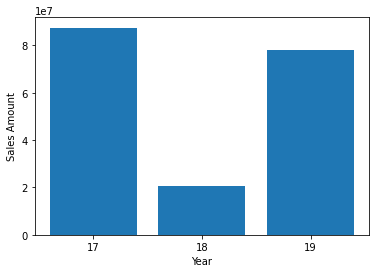

In [57]:
year=range(17,20)
plt.bar(year,data1.groupby('year')['Sales Amount'].sum())
plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.show()

* From the above bar plot we can say that in 2018 Sale Amount was lowest compared to other.
* In 2018 Sale Amount was lowest 

In [58]:
data1.groupby('Month')['Sales Margin Amount'].sum()

Month
1     8156834.02
2     8659736.01
3     9221717.72
4     5033153.95
5     4590199.03
6     6613519.87
7     5595911.01
8     6006858.46
9     6941676.04
10    5250949.47
11    5664242.96
12    6019924.57
Name: Sales Margin Amount, dtype: float64

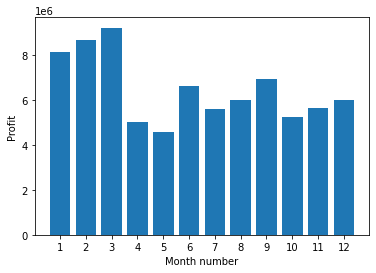

In [59]:
months=range(1,13)
plt.bar(months,data1.groupby('Month')['Sales Margin Amount'].sum())
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Profit')
plt.show()

* From the above bar plot we can say that in march profit was highest compared to other.
* In may profit was lowest 

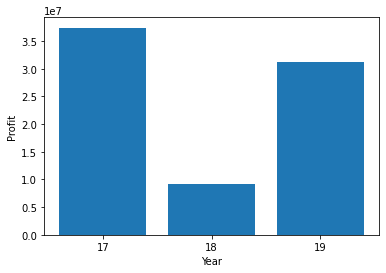

In [60]:
year=range(17,20)
plt.bar(year,data1.groupby('year')['Sales Margin Amount'].sum())
plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


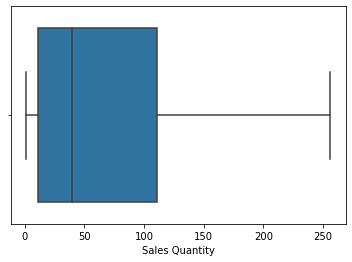

In [62]:
users = data1['CustKey'].value_counts().reset_index()
users.columns = ['CustKey', 'Sales Quantity']
sns.boxplot(users['Sales Quantity'], sym='')
plt.show()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

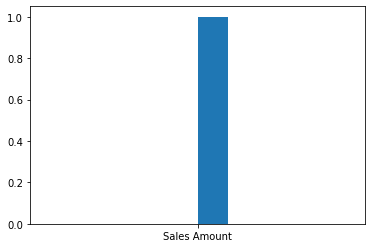

In [63]:
plt.hist('Sales Amount')

array([[<AxesSubplot:title={'center':'Sales Amount'}>]], dtype=object)

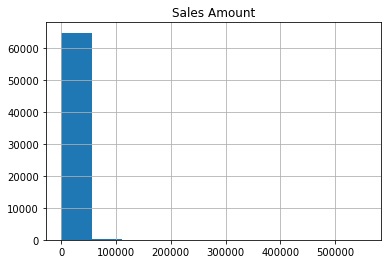

In [65]:
data1.hist('Sales Amount',bins=10)

array([[<AxesSubplot:title={'center':'Sales Margin Amount'}>]],
      dtype=object)

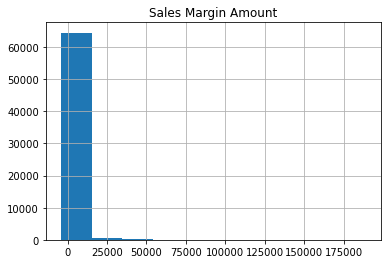

In [66]:
data1.hist('Sales Margin Amount',bins=10)

<AxesSubplot:ylabel='Count'>

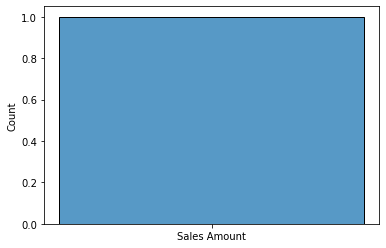

In [67]:
sns.histplot('Sales Amount',bins=10)

C:\Users\Aman\anaconda3\lib\site-packages\abc_analysis\abc_analysis.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = pd.Series([0]).append(y)
C:\Users\Aman\anaconda3\lib\site-packages\abc_analysis\abc_analysis.py:164: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = pd.Series([0]).append(x)


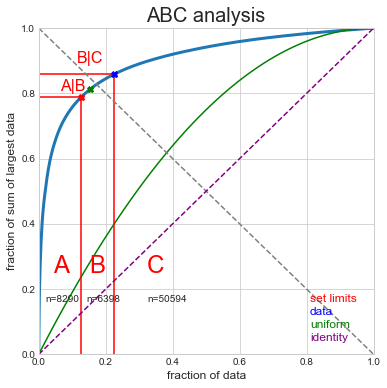

In [68]:
sales_amount=abc_analysis(data1['Sales Amount'],True)

In [69]:
a_index=sales_amount['Aind']
b_index=sales_amount['Bind']
c_index=sales_amount['Cind']


cond_list=[data1.index.isin(a_index),
          data1.index.isin(b_index),
          data1.index.isin(c_index)]


choice_list=['A','B','C']
data1['sales_amount']=np.select(cond_list,choice_list)
data1.sort_values(by=['Sales Amount'],ascending=False)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,month_year,Month,Year,year,sales_amount
58946,10006919,2018-01-06,-16176.00,2018-01-06,219898,NaN,32920,High Top Dried Mushrooms,1000,33.70,...,188800.00,34.711,16000,149,EA,18-01,1,18,18,A
30109,10025052,2017-07-14,0.00,2017-07-14,107473,NaN,32920,High Top Dried Mushrooms,1000,33.70,...,172624.00,33.700,16000,149,EA,17-07,7,17,17,A
25290,10025052,2017-06-16,0.00,2017-06-16,105110,NaN,32920,High Top Dried Mushrooms,1000,33.70,...,185907.20,33.700,16000,149,EA,17-06,6,17,17,A
15373,10025052,2017-04-14,0.00,2017-04-14,131410,NaN,32920,High Top Dried Mushrooms,1000,33.70,...,172624.00,33.700,16000,149,EA,17-04,4,17,17,A
1741,10025052,2017-01-14,0.00,2017-01-14,119898,NaN,32920,High Top Dried Mushrooms,1000,33.70,...,172624.00,33.700,16000,149,EA,17-01,1,17,17,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41428,10025305,2017-09-25,147.23,2017-09-25,114052,P01,61650,Better Canned Tuna in Water,9000,347.24,...,77.19,200.010,1,111,EA,17-09,9,17,17,C
19789,10011398,2019-05-17,8.33,2019-05-17,301155,P01,37132,Tell Tale Mandarin Oranges,1000,208.34,...,54.61,200.010,1,185,EA,19-05,5,19,19,C
19635,10027119,2017-05-14,147.23,2017-05-14,102180,P01,37132,Tell Tale Mandarin Oranges,9000,347.24,...,54.61,200.010,1,117,EA,17-05,5,17,17,C
52249,10025305,2017-11-27,147.23,2017-11-27,127609,P01,61650,Better Canned Tuna in Water,9000,347.24,...,77.19,200.010,1,111,EA,17-11,11,17,17,C


C:\Users\Aman\anaconda3\lib\site-packages\abc_analysis\abc_analysis.py:136: UserWarning: negative values found. Will continue by replacing them by 0. This can lead to unexpected results!
  warnings.warn('negative values found. Will continue by replacing them'\
C:\Users\Aman\anaconda3\lib\site-packages\abc_analysis\abc_analysis.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = pd.Series([0]).append(y)
C:\Users\Aman\anaconda3\lib\site-packages\abc_analysis\abc_analysis.py:164: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = pd.Series([0]).append(x)
C:\Users\Aman\anaconda3\lib\site-packages\abc_analysis\abc_analysis.py:136: UserWarning: negative values found. Will continue by replacing them by 0. This can lead to unexpected results!
  warnings.warn('negative values found. Will continue by replacing the

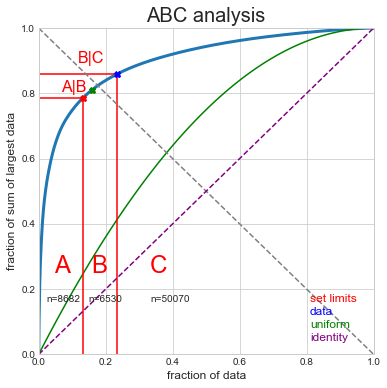

In [70]:
Profit=abc_analysis(data1['Sales Margin Amount'],True)

In [71]:
a_index=Profit['Aind']
b_index=Profit['Bind']
c_index=Profit['Cind']


cond_list=[data1.index.isin(a_index),
          data1.index.isin(b_index),
          data.index.isin(c_index)]


choice_list=['A','B','C']
data1['Profit']=np.select(cond_list,choice_list)
data1.sort_values(by=['Sales Margin Amount'],ascending=False)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Price,Sales Quantity,Sales Rep,U/M,month_year,Month,Year,year,sales_amount,Profit
58946,10006919,2018-01-06,-16176.0000,2018-01-06,219898,NaN,32920,High Top Dried Mushrooms,1000,33.7000,...,34.711000,16000,149,EA,18-01,1,18,18,A,A
19286,10025052,2017-05-12,0.0000,2017-05-12,101892,NaN,32920,High Top Dried Mushrooms,1000,33.7000,...,33.700000,16000,149,EA,17-05,5,17,17,A,A
25290,10025052,2017-06-16,0.0000,2017-06-16,105110,NaN,32920,High Top Dried Mushrooms,1000,33.7000,...,33.700000,16000,149,EA,17-06,6,17,17,A,A
1741,10025052,2017-01-14,0.0000,2017-01-14,119898,NaN,32920,High Top Dried Mushrooms,1000,33.7000,...,33.700000,16000,149,EA,17-01,1,17,17,A,A
15373,10025052,2017-04-14,0.0000,2017-04-14,131410,NaN,32920,High Top Dried Mushrooms,1000,33.7000,...,33.700000,16000,149,EA,17-04,4,17,17,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42393,10025242,2017-09-29,0.0000,2017-09-29,114316,NaN,29973,Just Right Chicken Soup,1000,1.8900,...,1.890000,1200,141,EA,17-09,9,17,17,B,C
53412,10025242,2017-12-01,0.0000,2017-12-01,127869,NaN,29973,Just Right Chicken Soup,1000,1.8900,...,1.890000,1200,141,EA,17-12,12,17,17,B,C
44133,10011355,2019-10-11,90.7200,2019-10-11,314316,NaN,29973,Just Right Chicken Soup,1000,1.8900,...,1.814400,1200,141,EA,19-10,10,19,19,B,C
55144,10011355,2019-12-13,90.7200,2019-12-13,327869,NaN,29973,Just Right Chicken Soup,1000,1.8900,...,1.814400,1200,141,EA,19-12,12,19,19,B,C


In [72]:
data1['Profit'].value_counts()

C    50070
A     8682
B     6530
Name: Profit, dtype: int64

In [73]:
data1['sales_amount'].value_counts()

C    50594
A     8290
B     6398
Name: sales_amount, dtype: int64

In [74]:
filter_1 = data1.filter(items=['Item','Profit'])
filter_1

,Item,Profit
0,Urban Large Eggs,C
1,Moms Sliced Turkey,C
2,Cutting Edge Foot-Long Hot Dogs,C
3,Kiwi Lox,C
4,High Top Sweet Onion,A
...,...,...
65277,High Top Oranges,C
65278,Landslide White Sugar,C
65279,Moms Potato Salad,C
65280,Better Fancy Canned Sardines,A


In [75]:
result = filter_1[filter_1['Profit']=='A']
result

,Item,Profit
4,High Top Sweet Onion,A
5,Best Choice Fudge Brownies,A
9,Big Time Frozen Cheese Pizza,A
10,Cutting Edge Foot-Long Hot Dogs,A
12,Better Fancy Canned Sardines,A
...,...,...
65244,Nationeel Potato Chips,A
65245,Big Time Frozen Cheese Pizza,A
65273,Moms Sliced Turkey,A
65280,Better Fancy Canned Sardines,A


## INSIGHTS FROM EDA
* Maximum sales and maimum profit was in year 2017 compared to the other two.
* lowest sales was in year 2018 compared to the other two.
* there are 657 unique food items.
* total number of customers are 615.

## Top product based on sales amount
* Better Large Canned Shrimp.

## Top product based on Profit
* Golden Frozen Corn.
* In march profit and sales amount was highest whereas in may lowest.